# ML Assignment 5  

Joseph Bentivegna  

Implement expectation maximization on a Gaussian mixture model in 1 and 2 dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from scipy.stats import multivariate_normal
from random import *
import sklearn

In [2]:
#setup means of distributions
mu1 = [3, 7]
mu2 = [5, 2]
mu3 = [8, 5]

#setup covs of distributions
cov1 = np.absolute(np.cov(np.random.normal(size=25), np.random.normal(size=25)))
cov2 = np.absolute(np.cov(np.random.normal(size=25), np.random.normal(size=25)))
cov3 = np.absolute(np.cov(np.random.normal(size=25), np.random.normal(size=25)))

#setup distributions for plotting
gaus1 = np.random.multivariate_normal(mu1, cov1, 100)
gaus2 = np.random.multivariate_normal(mu2, cov2, 100)
gaus3 = np.random.multivariate_normal(mu3, cov3, 100)
gausPlot = np.concatenate((gaus1, gaus2, gaus3), axis=1)
gaus = np.concatenate((gaus1, gaus2, gaus3))

In [3]:
def plotGraph(gaus, mu, sd, pi, ax):
    
    #ax.scatter(gaus[:,0], gaus[:,1])
    
    #repeat weight calculations to determine classification color at each stage
    like1 = pi[0]*(multivariate_normal.pdf(gaus, mu[0], sd[0]))
    like2 = pi[1]*(multivariate_normal.pdf(gaus, mu[1], sd[1]))
    like3 = pi[2]*(multivariate_normal.pdf(gaus, mu[2], sd[2]))
    
    total = like1 + like2 + like3
    
    weight1 = like1/total
    weight2 = like2/total
    weight3 = like3/total
    
    #put weight values into a matrix for comparison
    values = np.column_stack((weight1, weight2, weight3))
    
    #logic to deteremine which color
    for i in range(0, len(gaus)):
        mval = np.argmax(values[i,:])
        if (mval == 0):
            ax.scatter(gaus[i,0], gaus[i,1], color='r')
        if (mval == 1):
            ax.scatter(gaus[i,0], gaus[i,1], color='g')
        if (mval == 2):
            ax.scatter(gaus[i,0], gaus[i,1], color='b')
    
    #produce contour circles
    X, Y = np.mgrid[0:10:.1, 0:10:.1]
    pos = np.empty(X.shape+(2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    rv0 = multivariate_normal(mu[0], sd[0])
    rv1 = multivariate_normal(mu[1], sd[1])
    rv2 = multivariate_normal(mu[2], sd[2])
    ax.contour(X, Y, rv0.pdf(pos), 1, colors='r')
    ax.contour(X, Y, rv1.pdf(pos), 1, colors='g')
    ax.contour(X, Y, rv2.pdf(pos), 1, colors='b')
    
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    
    return ax   

In [4]:
def EM(mu, sd, pi, d):

    #compute likelihoods using multivariate normal
    like1 = pi[0]*(multivariate_normal.pdf(d, mu[0], sd[0]))
    like2 = pi[1]*(multivariate_normal.pdf(d, mu[1], sd[1]))
    like3 = pi[2]*(multivariate_normal.pdf(d, mu[2], sd[2]))
    
    #compute denominator by summing likelihoods
    total = like1 + like2 + like3
    
    #devide to find weights
    weight1 = np.atleast_2d(like1/total)
    weight2 = np.atleast_2d(like2/total)
    weight3 = np.atleast_2d(like3/total)
    
    #compute mean
    mean1 = np.sum(d*weight1.T, axis=0)/np.sum(weight1, axis=1)
    mean2 = np.sum(d*weight2.T, axis=0)/np.sum(weight2, axis=1)
    mean3 = np.sum(d*weight3.T, axis=0)/np.sum(weight3, axis=1)

    #compute sd
    sd1 = np.absolute((weight1*(d-mean1).T@(d-mean1))/np.sum(weight1, axis=1))
    sd2 = np.absolute((weight2*(d-mean2).T@(d-mean2))/np.sum(weight2, axis=1))
    sd3 = np.absolute((weight3*(d-mean3).T@(d-mean3))/np.sum(weight3, axis=1))
    
    #compute pi's
    pi1 = np.sum(weight1, axis=1)/len(d)
    pi2 = np.sum(weight2, axis=1)/len(d)
    pi3 = np.sum(weight3, axis=1)/len(d)
    
    muNew = [mean1, mean2, mean3]
    sdNew = [sd1, sd2, sd3]
    piNew = [pi1, pi2, pi3]
    
    #print(muNew, sdNew)
    
    return muNew, sdNew, piNew

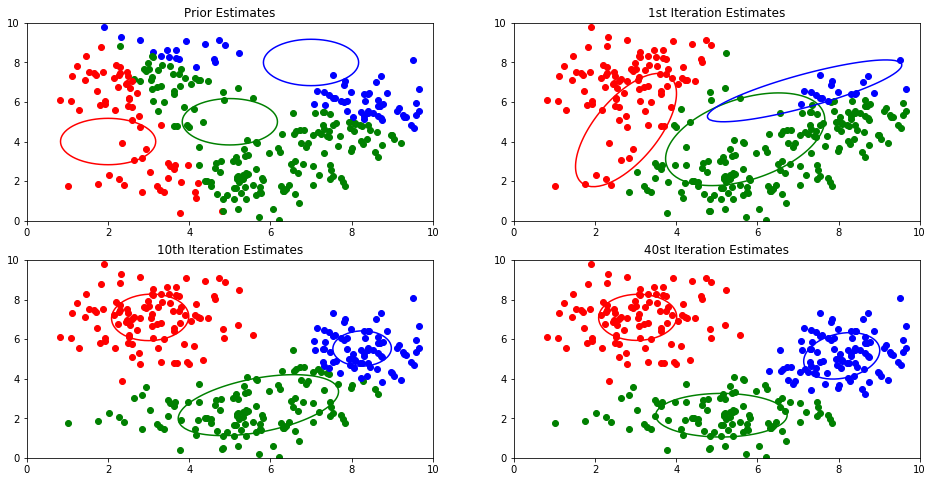

In [5]:
#priors
mup = [[2, 4], [5, 5], [7, 8]]
sdp = [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]]
pip = [.33, .33, .33]

#first iteration
mu1, sd1, pi1 = EM(mup, sdp, pip, gaus)
mut = mu1
sdt = sd1
pit = pip

#subsequent iterations
for i in range(0, 40):
    mut, sdt, pit = EM(mut, sdt, pit, gaus)
    if (i == 9):
        mu2 = mut
        sd2 = sdt
        pi2 = pit
    if (i == 39):
        mu3 = mut
        sd3 = sdt
        pi3 = pit
        
f, ax = plt.subplots(2, 2, figsize=[16,8])
plotGraph(gaus, mup, sdp, pip, ax[0,0])
ax[0,0].set_title('Prior Estimates')
plotGraph(gaus, mu1, sd1, pi1, ax[0,1])
ax[0,1].set_title('1st Iteration Estimates')
plotGraph(gaus, mu2, sd2, pi2, ax[1,0])
ax[1,0].set_title('10th Iteration Estimates')
plotGraph(gaus, mu3, sd3, pi3, ax[1,1])
ax[1,1].set_title('40st Iteration Estimates')
plt.show()